# Non-Negative Matrix Factorization (NMF) for Feature Extraction

## Introduction

Non-negative matrix factorization (NMF) is another unsupervised learning algorithm that extracts features from a given dataset. It works similarly to PCA and can also be used for dimensionality reduction.

The main difference between PCA and NMF is that PCA uses linear combinations of the original features to extract new features, while NMF uses non-negative linear combinations. This means that NMF can only be applied to datasets where all the features are non-negative.

Representing examples as non-negative linear combinations of features can be useful in some data that is created as a result of the mixing of different sources, such as an audio track of multiple instruments playing at the same time.

In these situations, NMF can identify the original components that make up the combined data.

Overall, NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret can‐cellation effects.

## Algorithm

Given a non-negative matrix $V \in \mathbb{R}^{m \times n}$, NMF factorizes it into two non-negative matrices $W \in \mathbb{R}^{m \times r}$ and $H \in \mathbb{R}^{r \times n}$, such that $V \approx WH$.

The objective function of NMF is to minimize the Frobenius norm of the difference between $V$ and $WH$:
$$
\min_{W \geq 0, H \geq 0} ||V - WH||_F^2
$$

The optimization problem can be solved using multiplicative updates, which are iterative algorithms that update the values of $W$ and $H$ in a way that decreases the objective function.

The multiplicative updates for NMF are:
$$
W_{ij} \leftarrow W_{ij} \frac{(VH^T)_{ij}}{(WHH^T)_{ij}}
$$
$$
H_{ij} \leftarrow H_{ij} \frac{(W^TV)_{ij}}{(W^TWH)_{ij}}
$$

The algorithm iterates over these updates until convergence.

- **Frobenius norm**: The Frobenius norm of a matrix $A$ is defined as:
$$
||A||_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2}
$$



In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


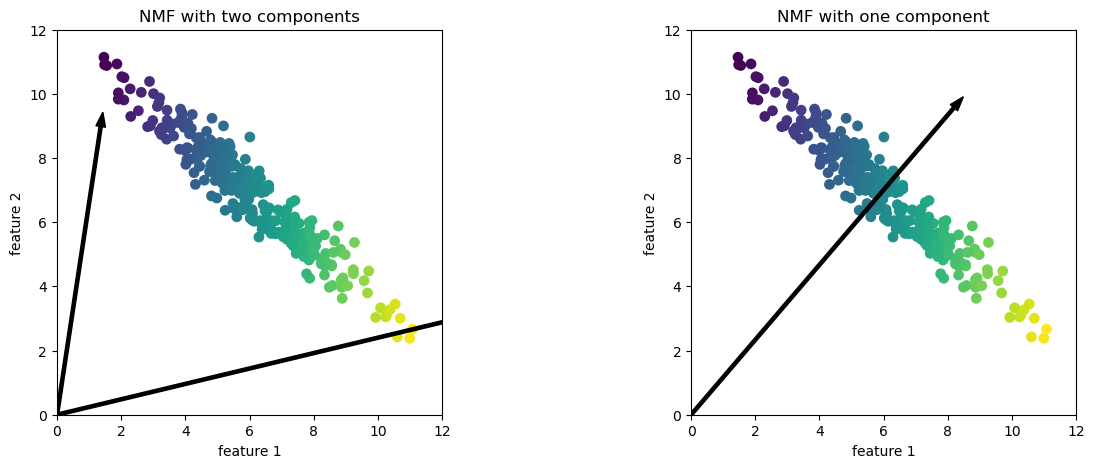

In [24]:
mglearn.plots.plot_nmf_illustration()

With two components:
- All points in the data are represented as a non-negative linear combination of two components.

With one component:
- NMF creates a single component that points twoard the mean of the data.

Components in NMF are not ordered in any way, so the first component does not necessarily explain the most variance in the data.

NMF uses a random initialization of the matrices $W$ and $H$, so the results can vary between runs.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape


In [28]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [29]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


KeyboardInterrupt: 

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


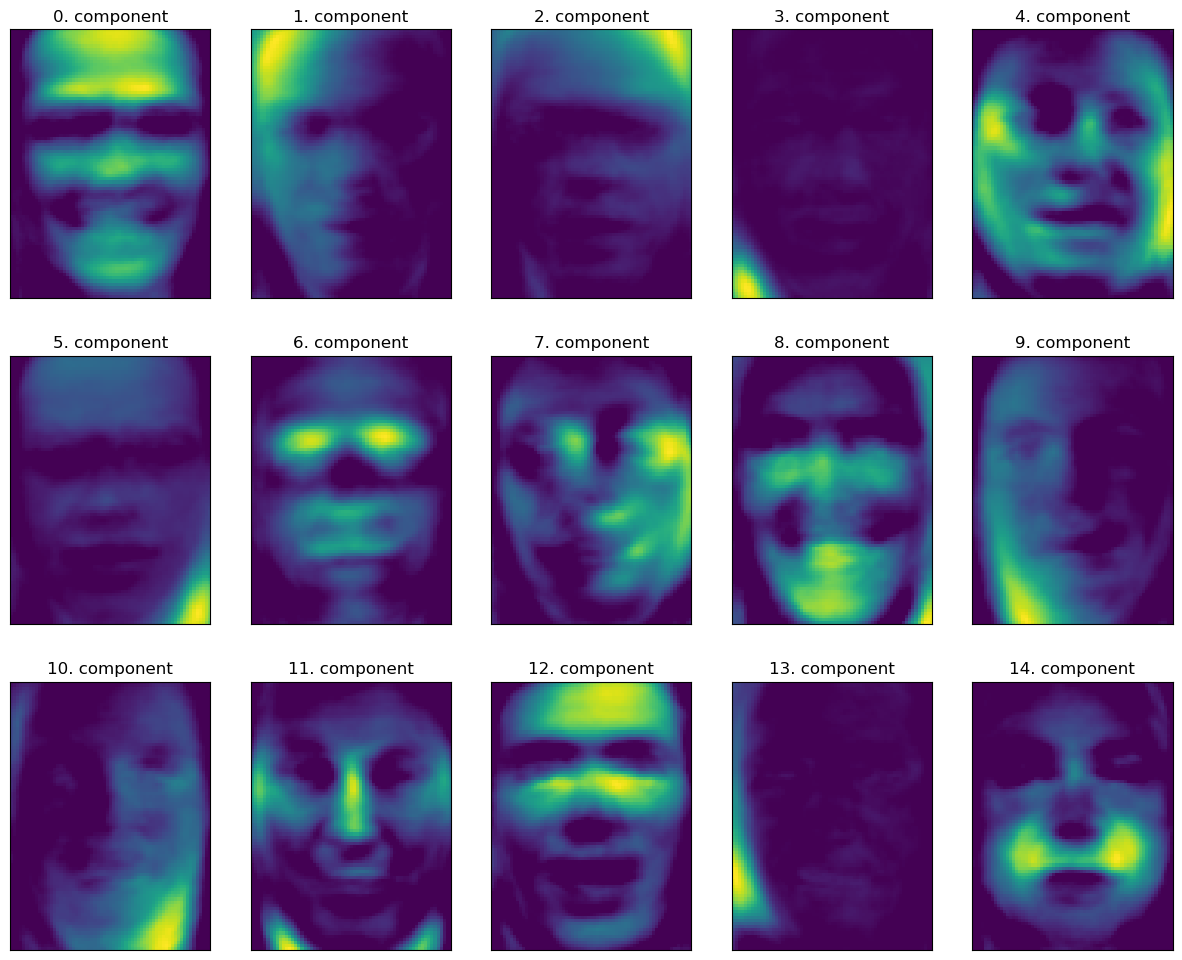

In [30]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

These components are all positive, and so resemble prototypes of faces much more than the components extracted by PCA.

- Component 3 shows a face rotated to the right.
- Component 7 shows a face rotated to the left.

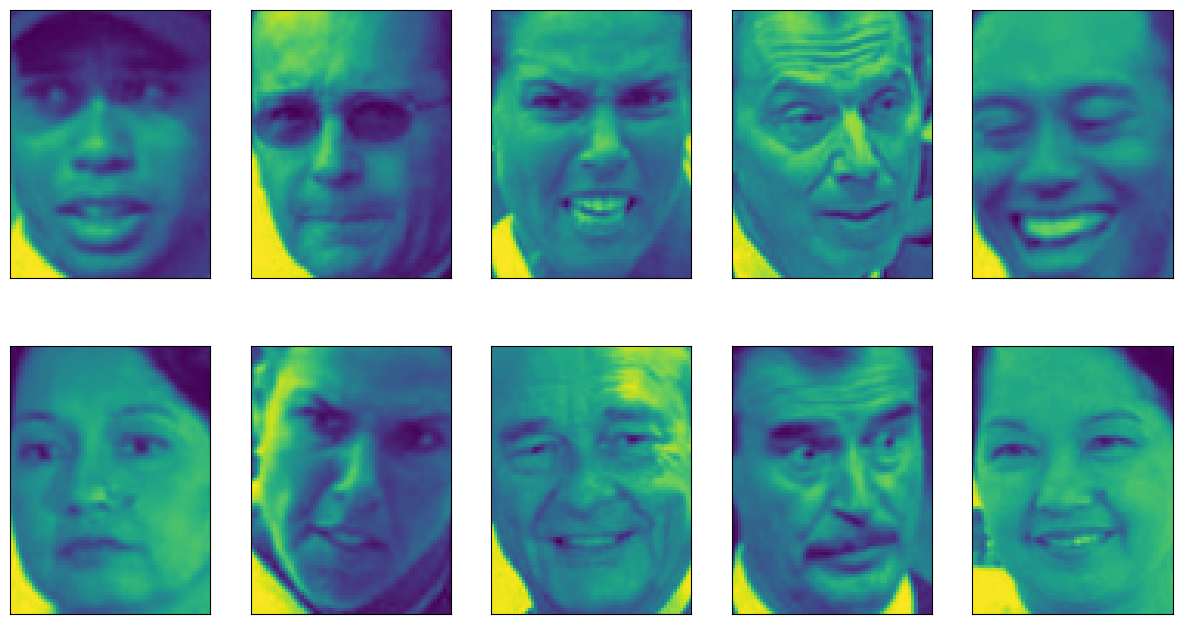

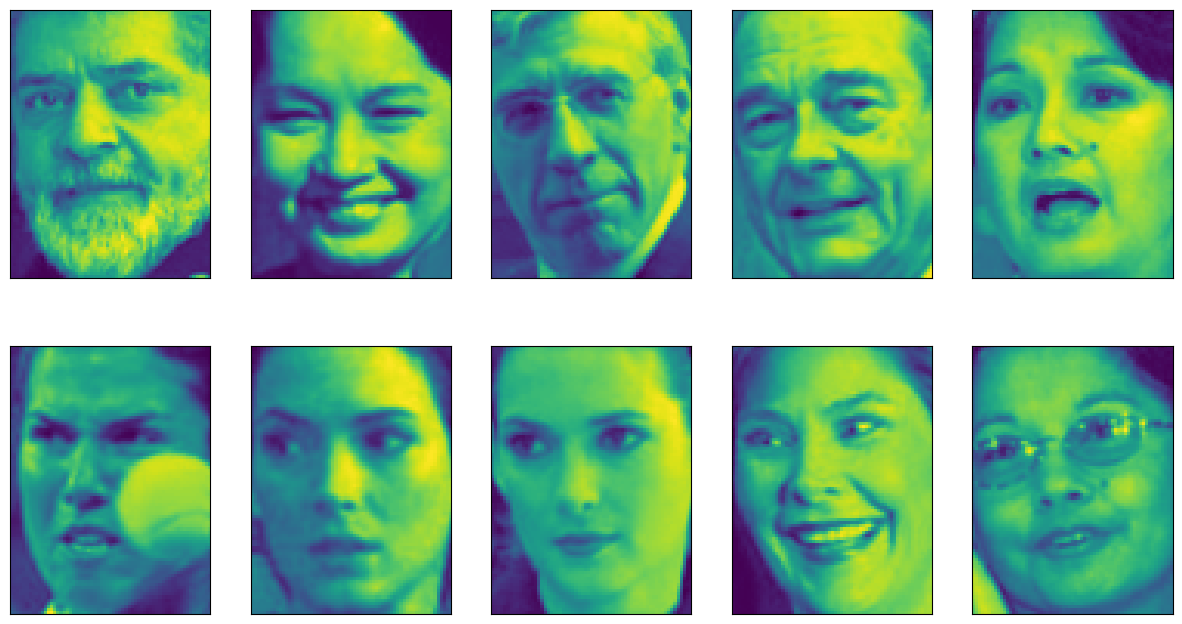

In [31]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={
                         'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={
                         'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- Faces that have a high coefficient for component 3 are turned to the right.
- Faces that have a high coefficient for component 7 are turned to the left.

Text(0, 0.5, 'Signal')

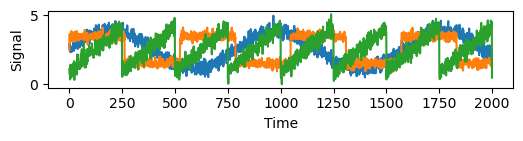

In [32]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [33]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [34]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

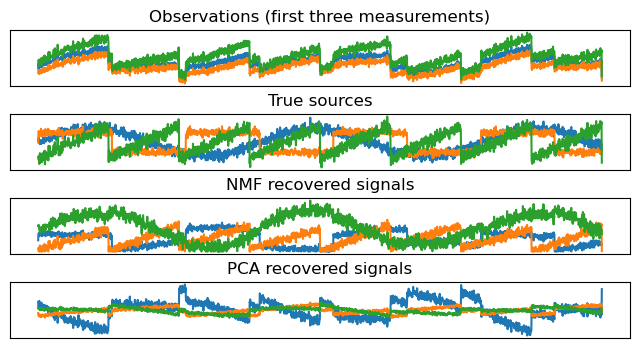

In [37]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- NMF discovered the original sources.
- PCA failed to discover the original sources and tied to explain the majority of the variation in the data with a first principal component.